## New file to resolve the issue stemming from the training DF size and the prediction DF size.
1. Training DF = 7241 columns
2. Prediction DF = 2216 columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reference: 01-Keras-Regression (section7: ANN)

In [3]:
#directory = 'C:/Users/te521690/OneDrive - TE Connectivity/Desktop/Canada Backlog/46. Jun 15, 2023/'
directory = 'C:/Users/te521690/OneDrive - TE Connectivity/Desktop/Canada Backlog/10. Feb 9, 2023/'

### Import Training file

In [4]:
df = pd.read_excel(directory + 'MFG 2 yr sales.xlsx', engine='openpyxl')

In [5]:
print(df.dtypes)

SITE                           int64
Invoice#                      object
InvoiceDt             datetime64[ns]
Invoice-Year#Month            object
SO#                           object
                           ...      
Ship-B4                       object
EDI Order                     object
SO-Userid                     object
Part Type                     object
StdLT                        float64
Length: 110, dtype: object


In [6]:
# # Replace '?' with a default value
# df['Desc1'].replace('+', '&', inplace=True)
# df['Desc2'].replace('+', '&', inplace=True)

In [7]:
#df.info()

In [8]:
df.head()

,SITE,Invoice#,InvoiceDt,Invoice-Year#Month,SO#,InvLine,Ord-Dt,CustPO,Buyer as of 1.4.17,Group,...,Hot Order,Hot Type,Due Date Changed Count,Original Due Date,Customer Class,Ship-B4,EDI Order,SO-Userid,Part Type,StdLT
0,2230,RJ700818,2021-02-08,21#02,RS992611,3,2021-02-03,172547-2,FVPP2,MTO7,...,nothot,nothot,0,2021-02-08 00:00:00,OMNI,yes,no,TE422115,MTSQS,3.0
1,2245,RJ700819,2021-02-08,21#02,RS992625,2,2021-02-03,172550- 6,FVPP3,ALRP,...,nothot,nothot,0,2021-02-08 00:00:00,OMNI,yes,no,TE422115,MTS,3.0
2,2245,RJ700820,2021-02-08,21#02,RS992629,9,2021-02-03,172552-11,FVPP3,ALRP,...,nothot,nothot,0,2021-02-08 00:00:00,OMNI,yes,no,TE422115,MTS,3.0
3,2244,RJ700821,2021-02-08,21#02,14485431,1,2020-12-14,2714485431,JZFGP2,GEL02,...,nothot,nothot,2,2021-04-27 00:00:00,1151,yes,no,cron,MTO,134.0
4,2230,RJ700822,2021-02-08,21#02,RS992779,7,2021-02-04,7890-395350,FVMP1,MTO1,...,nothot,nothot,0,2021-02-08 00:00:00,ELITE,yes,no,us055686,MTSQS,3.0


In [9]:
df1 = df.iloc[:,[4,5,22,24,89,108,30,6,26,103,2]]

In [10]:
df1.head()

,SO#,InvLine,Part,Desc1,OTTO-GPL,Part Type,QtyInvoiced,Ord-Dt,ReqDt,Original Due Date,InvoiceDt
0,RS992611,3,618951-000,HVS-1521S,752,MTSQS,10.0,2021-02-03,2021-02-08 00:00:00,2021-02-08 00:00:00,2021-02-08
1,RS992625,2,499268-000,ALR-AA-105,C08,MTS,132.0,2021-02-03,2021-02-08 00:00:00,2021-02-08 00:00:00,2021-02-08
2,RS992629,9,984054-000,ALR-AT-30,C08,MTS,12.0,2021-02-03,2021-02-08 00:00:00,2021-02-08 00:00:00,2021-02-08
3,14485431,1,CN2770-000,GELCAP-3-BULK(B50),749,MTO,1000.0,2020-12-14,2021-02-04 00:00:00,2021-04-27 00:00:00,2021-02-08
4,RS992779,7,EE0458-000,WCSM-34/8-225-S-(B50),755,MTSQS,500.0,2021-02-04,2021-02-08 00:00:00,2021-02-08 00:00:00,2021-02-08


In [11]:
df1['SO#'] = df1['SO#'].astype(str)

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df1['Part'] = df1['Part'].astype(str)

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1['Desc1'] = df1['Desc1'].astype(str)

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
# df1['OTTO-GPL'] = df1['OTTO-GPL'].astype(str)

In [15]:
# Replace '?' with a default value
df1['ReqDt'].replace('?', '1970-01-01', inplace=True)

# Convert to datetime64
df1['ReqDt'] = pd.to_datetime(df1['ReqDt'], errors='coerce')


C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
# Replace '?' with a default value
df1['Original Due Date'].replace('?', '1970-01-01', inplace=True)

# Convert to datetime64
df1['Original Due Date'] = pd.to_datetime(df1['Original Due Date'], errors='coerce')


C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
# Assuming you have a DataFrame called df1 with a column named 'Ord-Dt'
count = df1['Ord-Dt'].astype(str).str.contains('1949-', na=False).sum()
print(count)

3


In [18]:
df1 = df1[df1['Ord-Dt']> '2000-01-01']

In [19]:
df1 = df1[df1['ReqDt']> '2000-01-01']

In [20]:
df1 = df1[df1['Original Due Date']> '2000-01-01']

In [21]:
df1 = df1[df1['InvoiceDt']> '2000-01-01']

In [22]:
df1['InvoiceDt'].min()

Timestamp('2021-02-08 00:00:00')

In [23]:
df1.columns

Index(['SO#', 'InvLine', 'Part', 'Desc1', 'OTTO-GPL', 'Part Type',
       'QtyInvoiced', 'Ord-Dt', 'ReqDt', 'Original Due Date', 'InvoiceDt'],
      dtype='object')

In [24]:
df1.drop(['SO#','InvLine','Desc1'], axis=1,inplace=True)

In [25]:
df1.dtypes

Part                         object
OTTO-GPL                     object
Part Type                    object
QtyInvoiced                 float64
Ord-Dt               datetime64[ns]
ReqDt                datetime64[ns]
Original Due Date    datetime64[ns]
InvoiceDt            datetime64[ns]
dtype: object

In [26]:
#set(df1['OTTO-GPL'])

In [27]:
df1['OTTO-GPL'].isna().value_counts()

False    162800
Name: OTTO-GPL, dtype: int64

In [28]:
df1['Part Type'].replace({'mto':'MTO',
                          'mts':'MTS'},
                          inplace=True)

In [29]:
set(df1['Part Type'])

{'(blank)', 3, 'ATO', 'COMP', 'MTO', 'MTS', 'MTSQS', nan}

In [30]:
df1['Part Type'].isna().value_counts()

False    162313
True        487
Name: Part Type, dtype: int64

In [31]:
# dropna from DF1
df1.dropna(subset=['Part Type'], inplace=True)

In [32]:
df1 = df1[(df1['Part Type'] != 'NA') & (df1['Part Type'] != '(blank)')& (df1['Part Type'] != 3)& (df1['Part Type'] != 21)& (df1['Part Type'] != 103)& (df1['Part Type'] != 20) & (df1['Part Type'] != 116)]

In [33]:
df1['Part Type'].value_counts()

MTS      72404
MTO      34092
ATO      31177
MTSQS    24532
COMP        67
Name: Part Type, dtype: int64

In [34]:
df1['OTTO-GPL'].value_counts().head(15)

364    30043
760    19188
755    15518
F14    14720
753    11758
749    10158
752     8864
751     6935
758     6187
750     4954
J71     3987
141     3928
814     3740
151     3515
E82     2841
Name: OTTO-GPL, dtype: int64

In [35]:
df1.dropna(subset=['OTTO-GPL'], inplace=True)

In [36]:
df1['Part'] = df1['Part'].str.upper()

In [37]:
set(df1['Part'])

{'EE0688-000',
 'ES0946-000',
 'ED2738-000',
 'F85774-000',
 'EB8247-000',
 'EL6969-000',
 'CN4340-000',
 '592965-000',
 '590637-000',
 '560390-005',
 '895543-000',
 'EN3751-205',
 'EP3218-000',
 'EN3751-103',
 'BM9015-000',
 'CG8858-000',
 'CR1317-000',
 'ED9342-000',
 'EA3333-000',
 '1-2182448-5',
 'ER1735-004',
 '268120-000',
 'EP6130-000',
 '797970-000',
 'EE0620-000',
 'EH7823-000',
 '814603-000',
 'CF1442-000',
 'EB8652-000',
 '155713-000',
 'C46509-000',
 'EN3750-333',
 'EK4992-000',
 'EK9065-000',
 'ER1199-000',
 'CR9908-000',
 'CM3884-000',
 '1971903-1',
 'E65650-000',
 'CS8870-001',
 '2182994-6',
 '117171-000',
 '753589-000',
 'ED0490-000',
 'EP4990-000',
 '802234-000',
 '633125-000',
 'EP6680-000',
 'CG3600-000',
 '168622-000',
 'CM9458-000',
 'CM4248-000',
 'CS8879-011',
 '83221F-000',
 'CG3708-000',
 '760924-000',
 'EP9673-000',
 '607477-000',
 'EN3750-384',
 'EE1121-000',
 '558424-000',
 '983034-000',
 'EE0631-000',
 'EN3742-051',
 '2405558-7',
 '044191-000',
 'EK0859-006

In [38]:
df1['Part'].isna().value_counts()

False    162272
Name: Part, dtype: int64

In [39]:
df1['Part'].value_counts()

871788-000    1729
360954-000    1471
197886-000     898
268120-000     822
244890-000     816
              ... 
EP8509-000       1
872568-000       1
E16246-000       1
2384755-4        1
ES2996-000       1
Name: Part, Length: 7103, dtype: int64

In [40]:
# C_LT = []
# for i in range(len(df1['ReqDt'])):
#     timedelta = df1['ReqDt'][i] - df1['Ord-Dt'][i]
#     timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
#     if -1000 < timedelta_days < 1000:
#         C_LT.append(timedelta_days)
#     else:
#         C_LT.append(0)

# df1['Customer LT'] = C_LT

In [41]:
D_LT = []
for index, row in df1.iterrows():
    timedelta = row['Original Due Date'] - row['Ord-Dt']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        D_LT.append(timedelta_days)
    else:
        D_LT.append(0)

df1['TE_ship LT'] = D_LT


In [42]:
C_LT = []
for index, row in df1.iterrows():
    timedelta = row['ReqDt'] - row['Ord-Dt']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        C_LT.append(timedelta_days)
    else:
        C_LT.append(0)

df1['Customer LT'] = C_LT


In [43]:
S_LT = []
for index, row in df1.iterrows():
    timedelta = row['InvoiceDt'] - row['Ord-Dt']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        S_LT.append(timedelta_days)
    else:
        S_LT.append(0)

df1['Shipping LT'] = S_LT


In [44]:
df_y = df1[(df1['OTTO-GPL']==364)|
           (df1['OTTO-GPL']==760)|
           (df1['OTTO-GPL']==755)|
           (df1['OTTO-GPL']=='F14')|
           (df1['OTTO-GPL']==753)|
          (df1['OTTO-GPL']==748)|
          (df1['OTTO-GPL']==749)|
          (df1['OTTO-GPL']==752)|
          (df1['OTTO-GPL']==751)|
          (df1['OTTO-GPL']==757)|
          (df1['OTTO-GPL']==758)|
          (df1['OTTO-GPL']==750)|
          (df1['OTTO-GPL']=='E78')|
          (df1['OTTO-GPL']=='E82')|
          (df1['OTTO-GPL']=='JA2')|
          (df1['OTTO-GPL']=='J71')|
          (df1['OTTO-GPL']=='KB1')|
          (df1['OTTO-GPL']==141)|
          (df1['OTTO-GPL']==151)|
          (df1['OTTO-GPL']==435)]


In [45]:
df_y.head()

,Part,OTTO-GPL,Part Type,QtyInvoiced,Ord-Dt,ReqDt,Original Due Date,InvoiceDt,TE_ship LT,Customer LT,Shipping LT
0,618951-000,752,MTSQS,10.0,2021-02-03,2021-02-08,2021-02-08,2021-02-08,5,5,5
3,CN2770-000,749,MTO,1000.0,2020-12-14,2021-02-04,2021-04-27,2021-02-08,134,52,56
4,EE0458-000,755,MTSQS,500.0,2021-02-04,2021-02-08,2021-02-08,2021-02-08,4,4,4
5,921440-000,141,MTS,25500.0,2020-12-08,2020-12-21,2021-02-08,2021-02-08,62,13,62
8,205901-000,753,MTSQS,60.0,2021-02-03,2021-02-08,2021-02-08,2021-02-08,5,5,5


In [46]:
df_y.groupby(by='OTTO-GPL').mean()

,QtyInvoiced,TE_ship LT,Customer LT,Shipping LT
OTTO-GPL,,,,
141,967.373727,64.940173,41.847251,50.161405
151,9.601707,26.272546,13.823329,29.510100
364,503.279300,72.292947,30.236860,53.564691
435,8098.742308,186.873077,98.057692,206.596154
748,7.159653,93.395918,75.908163,97.380612
749,190.412483,36.820339,19.887773,23.582595
750,1184.350828,47.531086,36.779168,57.648567
751,103.270224,37.127902,29.246575,38.507282
752,115.357062,48.467735,28.526963,59.778317


In [47]:
df_y.groupby(by='OTTO-GPL').count()

,Part,Part Type,QtyInvoiced,Ord-Dt,ReqDt,Original Due Date,InvoiceDt,TE_ship LT,Customer LT,Shipping LT
OTTO-GPL,,,,,,,,,,
141,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928
151,3515,3515,3515,3515,3515,3515,3515,3515,3515,3515
364,30043,30043,30043,30043,30043,30043,30043,30043,30043,30043
435,260,260,260,260,260,260,260,260,260,260
748,980,980,980,980,980,980,980,980,980,980
749,10158,10158,10158,10158,10158,10158,10158,10158,10158,10158
750,4954,4954,4954,4954,4954,4954,4954,4954,4954,4954
751,6935,6935,6935,6935,6935,6935,6935,6935,6935,6935
752,8864,8864,8864,8864,8864,8864,8864,8864,8864,8864


In [48]:
df_y.groupby('Part Type').mean().reset_index()

,Part Type,QtyInvoiced,TE_ship LT,Customer LT,Shipping LT
0,ATO,162.193120,50.126933,36.773477,54.725955
1,COMP,697.787234,52.042553,62.553191,79.085106
2,MTO,640.289688,43.194866,35.935446,54.134529
3,MTS,690.990668,49.916052,26.501344,42.311876
4,MTSQS,109.527623,23.616219,11.027521,22.128144


In [49]:
df_y.groupby('Part Type').count().reset_index()

,Part Type,Part,OTTO-GPL,QtyInvoiced,Ord-Dt,ReqDt,Original Due Date,InvoiceDt,TE_ship LT,Customer LT,Shipping LT
0,ATO,29039,29039,29039,29039,29039,29039,29039,29039,29039,29039
1,COMP,47,47,47,47,47,47,47,47,47,47
2,MTO,29882,29882,29882,29882,29882,29882,29882,29882,29882,29882
3,MTS,63599,63599,63599,63599,63599,63599,63599,63599,63599,63599
4,MTSQS,24527,24527,24527,24527,24527,24527,24527,24527,24527,24527


In [50]:
corr_sales = df_y.groupby('OTTO-GPL')[['Customer LT','TE_ship LT','Shipping LT']].corr().reset_index()

### ここで一旦Training DF のプロセスを止めて、Prediction DFを取り込む。そしてTraining DFの部品数とPrediction DFの部品数を合わせる。そうすることで最初のファイルで発生したエラーを解消できる。

In [51]:
log = pd.read_excel(directory + 'MFG PRO backlog.xlsx', engine='openpyxl')

In [52]:
log1 = log.iloc[:,[6,11,12,91,59,111,8,35,37]]

In [53]:
log1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SO-Nbr       9496 non-null   object        
 1   SO Line      9496 non-null   int64         
 2   Part         9496 non-null   object        
 3   OTTO-GPL     9494 non-null   object        
 4   Part-Type    9442 non-null   object        
 5   Qty Ordered  9496 non-null   float64       
 6   SO-Ord_date  9496 non-null   datetime64[ns]
 7   Req-Date     9496 non-null   datetime64[ns]
 8   Due-Date     9496 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 667.8+ KB


In [54]:
log1['Part-Type'].replace({'mto':'MTO',
                           'mto ':'MTO',
                           'mts':'MTS'},inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [55]:
log1['Part'] = log1['Part'].str.upper()

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
log1['Part-Type'] = log1['Part-Type'].str.upper()

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
log1.rename(columns={'SO-Ord_date':'SO_Ord_date','Req-Date':'Req_Date','Due-Date':'Due_Date','Part-Type':'Part Type'}, inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
log1['Part Type'].isna().value_counts()

False    9442
True       54
Name: Part Type, dtype: int64

In [59]:
log1.dropna(subset=['Part Type'],inplace=True)

C:\Users\te521690\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [60]:
log1['Part Type'].replace('MTO ','MTO', inplace=True)

In [61]:
log1 = log1[log1['Part Type'] != '(BLANK)']

In [62]:
log1['Part Type'].value_counts()

MTS      4666
ATO      2195
MTO      1760
MTSQS     806
COMP       13
Name: Part Type, dtype: int64

In [63]:
log1['Part'].isna().value_counts()

False    9440
Name: Part, dtype: int64

In [64]:
log1['OTTO-GPL'].isna().value_counts()

False    9439
True        1
Name: OTTO-GPL, dtype: int64

In [65]:
log1.dropna(subset=['OTTO-GPL'], inplace=True)

In [66]:
log1['OTTO-GPL'].value_counts()

364    2469
760     813
753     629
758     585
750     581
141     520
752     425
751     394
755     348
749     322
J71     313
757     242
B82     232
Z72     216
151     204
E82     201
KB1     154
814     135
761     125
AA5      93
Z63      63
C08      46
748      46
A27      33
E78      29
JA2      25
AF8      24
822      23
827      18
435      16
E33      16
F14      14
819      13
813      13
K93       9
G38       8
E77       7
C04       6
652       4
AF7       4
AI9       3
829       2
566       2
817       2
586       2
728       2
A46       1
607       1
B95       1
710       1
JH1       1
C88       1
E34       1
C09       1
Name: OTTO-GPL, dtype: int64

In [67]:
C_LT = []
for index, row in log1.iterrows():
    timedelta = row['Req_Date'] - row['SO_Ord_date']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        C_LT.append(timedelta_days)
    else:
        C_LT.append(0)

log1['Customer LT'] = C_LT


In [68]:
S_LT = []
for index, row in log1.iterrows():
    timedelta = row['Due_Date'] - row['SO_Ord_date']
    timedelta_days = timedelta.days  # Extract the number of days from the timedelta object
    if -1000 < timedelta_days < 1000:
        S_LT.append(timedelta_days)
    else:
        S_LT.append(0)

log1['TE_ship LT'] = S_LT

In [69]:
log1['Part Type'].replace(['Part Type_MTO ','Part Type_MTO'], inplace=True)

In [70]:
log1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9439 entries, 0 to 9495
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SO-Nbr       9439 non-null   object        
 1   SO Line      9439 non-null   int64         
 2   Part         9439 non-null   object        
 3   OTTO-GPL     9439 non-null   object        
 4   Part Type    9439 non-null   object        
 5   Qty Ordered  9439 non-null   float64       
 6   SO_Ord_date  9439 non-null   datetime64[ns]
 7   Req_Date     9439 non-null   datetime64[ns]
 8   Due_Date     9439 non-null   datetime64[ns]
 9   Customer LT  9439 non-null   int64         
 10  TE_ship LT   9439 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 884.9+ KB


In [71]:
# Training DF内の項目数との確認が始まる
import pandas as pd

# 1. Create a dataframe based on df1['Part'] then remove duplicates.
Part_no = df1['Part']
Part_no = Part_no.drop_duplicates()

In [72]:
Part_no=pd.DataFrame(Part_no)

In [73]:
Part_no.value_counts()

Part      
000144-000    1
ED8994-000    1
ED9024-000    1
ED9014-000    1
ED9012-000    1
             ..
978928-000    1
978582-000    1
977824-000    1
977606-000    1
Y69991-000    1
Length: 7103, dtype: int64

In [74]:
Part_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7103 entries, 0 to 165341
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Part    7103 non-null   object
dtypes: object(1)
memory usage: 111.0+ KB


In [75]:
df1_GPL = df1['OTTO-GPL'].drop_duplicates()

In [76]:
df1_GPL = pd.DataFrame(df1_GPL)

In [77]:
df1_GPL.value_counts()

OTTO-GPL
1           1
A52         1
B82         1
ANB         1
AN8         1
           ..
749         1
748         1
746         1
731         1
Z72         1
Length: 93, dtype: int64

In [78]:
Part_T = df1['Part Type'].drop_duplicates()

In [79]:
Part_T.value_counts()

MTSQS    1
MTS      1
MTO      1
ATO      1
COMP     1
Name: Part Type, dtype: int64

In [80]:
# df1のpart list, GPL list, part type listをここで統合すること！

In [81]:
# ここでは、part, GPL, part type, LTを指定するべき？

log2 = pd.merge(Part_no, log1, on='Part', how='inner')

In [82]:
log2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8911 entries, 0 to 8910
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Part         8911 non-null   object        
 1   SO-Nbr       8911 non-null   object        
 2   SO Line      8911 non-null   int64         
 3   OTTO-GPL     8911 non-null   object        
 4   Part Type    8911 non-null   object        
 5   Qty Ordered  8911 non-null   float64       
 6   SO_Ord_date  8911 non-null   datetime64[ns]
 7   Req_Date     8911 non-null   datetime64[ns]
 8   Due_Date     8911 non-null   datetime64[ns]
 9   Customer LT  8911 non-null   int64         
 10  TE_ship LT   8911 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 835.4+ KB


In [83]:
# log2 = pd.merge(Part_no.to_frame(), log1, on='Part', how='inner')

In [84]:
log2 = pd.merge(df1_GPL, log2, on='OTTO-GPL', how='inner')

In [85]:
log2 = pd.merge(Part_T, log2, on='Part Type', how='inner')

In [86]:
# このコードを流すとlog2のケース数が8000件から1000件に激減する→修正した
# log2 = pd.merge(df1_GPL.to_frame(), log2, on='OTTO-GPL', how='inner')

In [87]:
log2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8911 entries, 0 to 8910
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Part Type    8911 non-null   object        
 1   OTTO-GPL     8911 non-null   object        
 2   Part         8911 non-null   object        
 3   SO-Nbr       8911 non-null   object        
 4   SO Line      8911 non-null   int64         
 5   Qty Ordered  8911 non-null   float64       
 6   SO_Ord_date  8911 non-null   datetime64[ns]
 7   Req_Date     8911 non-null   datetime64[ns]
 8   Due_Date     8911 non-null   datetime64[ns]
 9   Customer LT  8911 non-null   int64         
 10  TE_ship LT   8911 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 835.4+ KB


In [88]:
# training df用のパーツリスト作成
Final_PartNo = log2['Part'].drop_duplicates()

In [89]:
Final_PartNo = pd.DataFrame(Final_PartNo)

In [90]:
Final_PartNo.value_counts()

Part      
000144-000    1
D53039-000    1
D96124-000    1
D93334-000    1
D93089-000    1
             ..
761103-000    1
757625-000    1
756331-000    1
756315-000    1
Y12345-000    1
Length: 2124, dtype: int64

In [91]:
Final_GPL = log2['OTTO-GPL'].drop_duplicates()

In [92]:
Final_GPL = pd.DataFrame(Final_GPL)

In [93]:
df2 = pd.merge(Final_PartNo, df1, on='Part', how='left')

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113588 entries, 0 to 113587
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Part               113588 non-null  object        
 1   OTTO-GPL           113588 non-null  object        
 2   Part Type          113588 non-null  object        
 3   QtyInvoiced        113588 non-null  float64       
 4   Ord-Dt             113588 non-null  datetime64[ns]
 5   ReqDt              113588 non-null  datetime64[ns]
 6   Original Due Date  113588 non-null  datetime64[ns]
 7   InvoiceDt          113588 non-null  datetime64[ns]
 8   TE_ship LT         113588 non-null  int64         
 9   Customer LT        113588 non-null  int64         
 10  Shipping LT        113588 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(3), object(3)
memory usage: 10.4+ MB


In [95]:
df2 = pd.merge(Final_GPL, df2, on='OTTO-GPL', how='left')

In [96]:
# df2 = df2[df2['Customer LT']>0]

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113588 entries, 0 to 113587
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   OTTO-GPL           113588 non-null  object        
 1   Part               113588 non-null  object        
 2   Part Type          113588 non-null  object        
 3   QtyInvoiced        113588 non-null  float64       
 4   Ord-Dt             113588 non-null  datetime64[ns]
 5   ReqDt              113588 non-null  datetime64[ns]
 6   Original Due Date  113588 non-null  datetime64[ns]
 7   InvoiceDt          113588 non-null  datetime64[ns]
 8   TE_ship LT         113588 non-null  int64         
 9   Customer LT        113588 non-null  int64         
 10  Shipping LT        113588 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(3), object(3)
memory usage: 10.4+ MB


In [98]:
df2['Part'].value_counts()

871788-000    1729
360954-000    1471
197886-000     898
268120-000     822
244890-000     816
              ... 
2182485-2        1
CU5612-000       1
CG3665-000       1
2182445-3        1
E31927-000       1
Name: Part, Length: 2124, dtype: int64

In [99]:
df2['OTTO-GPL'].value_counts()

364    28435
760    15400
753    10231
755     9442
749     7963
752     6186
751     4654
750     3896
758     3663
141     3414
151     2945
814     2923
F14     2385
J71     2205
Z72     1972
761     1688
E82     1148
757      881
C08      699
KB1      609
B82      547
E33      465
AA5      324
A27      237
822      202
435      196
Z63      186
748      134
819       76
813       75
JA2       72
G38       63
E78       62
C04       44
827       43
652       23
K93       17
E77       16
JH1       16
AI9       15
AF8       14
B95        7
566        6
C88        3
A46        2
829        2
C09        1
E34        1
Name: OTTO-GPL, dtype: int64

### ↑ training用とpredict用のデータセットで部品数、Part Type、GPLが一致した。

In [100]:
log2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8911 entries, 0 to 8910
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Part Type    8911 non-null   object        
 1   OTTO-GPL     8911 non-null   object        
 2   Part         8911 non-null   object        
 3   SO-Nbr       8911 non-null   object        
 4   SO Line      8911 non-null   int64         
 5   Qty Ordered  8911 non-null   float64       
 6   SO_Ord_date  8911 non-null   datetime64[ns]
 7   Req_Date     8911 non-null   datetime64[ns]
 8   Due_Date     8911 non-null   datetime64[ns]
 9   Customer LT  8911 non-null   int64         
 10  TE_ship LT   8911 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 835.4+ KB


In [101]:
# Convert 'Req_Date' column to datetime
log2['Req_Date'] = pd.to_datetime(log2['Req_Date'])

# Convert datetime to Unix timestamp
log2['ReqDt_Euc'] = (log2['Req_Date'].astype('int64') // 10**9).astype('int')

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


In [102]:
log2['ReqDt_Euc'].value_counts()

-636854400     223
 1675987200    187
 1675036800    162
 1676332800    151
 1677542400    151
              ... 
 1616630400      1
 1691712000      1
 1617580800      1
 1691020800      1
 1646697600      1
Name: ReqDt_Euc, Length: 632, dtype: int64

In [103]:
from datetime import datetime

# Convert 'Ord-Dt' column to datetime
log2['SO_Ord_date'] = pd.to_datetime(log2['SO_Ord_date'])
# Convert datetime to Unix timestamp
log2['Ord-dt_Euc'] = (log2['SO_Ord_date'].astype('int64') // 10**9).astype('int')


# Convert 'Ord-Dt' column to datetime
log2['Due_Date'] = pd.to_datetime(log2['Due_Date'])
# Convert datetime to Unix timestamp
log2['DueDt_Euc'] = (log2['Due_Date'].astype('int64') // 10**9).astype('int')

C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
C:\Users\te521690\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  if sys.path[0] == '':


In [104]:
set(log2['Part Type'])

{'ATO', 'COMP', 'MTO', 'MTS', 'MTSQS'}

In [105]:
log2['Part'].value_counts()

166124-000    170
CP8406-000    147
197886-000    143
888660-000    108
780008-000     95
             ... 
EN0027-000      1
371113-000      1
724639-000      1
D61559-000      1
ER0135-000      1
Name: Part, Length: 2124, dtype: int64

In [106]:
log2['OTTO-GPL'].value_counts()

364    2444
760     794
753     612
758     539
750     528
141     518
752     420
751     381
755     343
749     300
J71     256
757     211
B82     206
Z72     206
151     190
E82     178
KB1     126
814     125
761     118
AA5      80
Z63      49
C08      46
A27      33
748      27
JA2      23
E33      16
435      16
AF8      16
E78      15
822      15
827      13
F14      13
813      10
G38       8
K93       7
819       5
C04       5
E77       4
652       4
566       2
AI9       2
B95       1
829       1
A46       1
C09       1
JH1       1
C88       1
E34       1
Name: OTTO-GPL, dtype: int64

In [107]:
# Identify the columns containing string variables
string_columns = ['Part', 'OTTO-GPL', 'Part Type']

# Perform one-hot encoding
dummy_variables = pd.get_dummies(log2[string_columns])

# Concatenate the dummy variables with the original dataset
log1_encoded = pd.concat([log2, dummy_variables], axis=1)

# Drop the original string columns if needed
log3 = log1_encoded.drop(string_columns, axis=1)


In [108]:
log3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8911 entries, 0 to 8910
Columns: 2188 entries, SO-Nbr to Part Type_MTSQS
dtypes: datetime64[ns](3), float64(1), int32(3), int64(3), object(1), uint8(2177)
memory usage: 19.2+ MB


In [109]:
log3.rename(columns={'Part-Type':'Part_Type',
                     'OTTO-GPL':'OTTO_GPL',
                     'Qty Ordered':'QtyInvoiced',
                     'Part_Type_(blank)':'Part Type_(blank)',
                     'Part_Type_ATO':'Part Type_ATO',
                     'Part_Type_COMP':'Part Type_COMP',
                     'Part_Type_MTS':'Part Type_MTS',
                     'Part_Type_MTSQS':'Part Type_MTSQS',
                     'SO_Ord_date_Euc':'Ord-Dt_Euc',
                     'Req_Date_Euc':'ReqDt_Euc',
                     'Due_Date_Euc':'DueDt_Euc'}, inplace=True)

In [110]:
# given from ChatGPT as a solution for the code above, but it still doesn't work.

In [111]:


# from datetime import datetime

# # Convert 'Ord-Dt' column to datetime
# log3['SO_Ord_date'] = pd.to_datetime(log3['SO_Ord_date'])
# # Convert datetime to Unix timestamp
# log3['SO_Ord_date_Euc'] = log3['SO_Ord_date'].apply(lambda x: x.to_pydatetime().timestamp() if pd.notnull(x) else None)

# # Convert 'Req_Date' column to datetime
# log3['Req_Date'] = pd.to_datetime(log3['Req_Date'])
# # Convert datetime to Unix timestamp
# log3['Req_Date_Euc'] = log3['Req_Date'].apply(lambda x: x.to_pydatetime().timestamp() if pd.notnull(x) else None)

# # Convert 'Due_Date' column to datetime
# log3['Due_Date'] = pd.to_datetime(log3['Due_Date'])
# # Convert datetime to Unix timestamp
# log3['Due_Date_Euc'] = log3['Due_Date'].apply(lambda x: x.to_pydatetime().timestamp() if pd.notnull(x) else None)


### Training DFとPrediction DFの項目数を合わせた後で、Training DFの残りのプロセスと学習を始める

In [112]:
df2['Part'].value_counts()

871788-000    1729
360954-000    1471
197886-000     898
268120-000     822
244890-000     816
              ... 
2182485-2        1
CU5612-000       1
CG3665-000       1
2182445-3        1
E31927-000       1
Name: Part, Length: 2124, dtype: int64

In [113]:
df2['Part Type'].value_counts()

MTS      60478
MTSQS    21020
ATO      18890
MTO      13181
COMP        19
Name: Part Type, dtype: int64

In [114]:
df2['OTTO-GPL'].value_counts()

364    28435
760    15400
753    10231
755     9442
749     7963
752     6186
751     4654
750     3896
758     3663
141     3414
151     2945
814     2923
F14     2385
J71     2205
Z72     1972
761     1688
E82     1148
757      881
C08      699
KB1      609
B82      547
E33      465
AA5      324
A27      237
822      202
435      196
Z63      186
748      134
819       76
813       75
JA2       72
G38       63
E78       62
C04       44
827       43
652       23
K93       17
E77       16
JH1       16
AI9       15
AF8       14
B95        7
566        6
C88        3
A46        2
829        2
C09        1
E34        1
Name: OTTO-GPL, dtype: int64

In [115]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
QtyInvoiced,113588.0,556.079956,6772.136235,-120000.0,10.0,38.0,140.0,642000.0
TE_ship LT,113588.0,46.501241,52.932551,-715.0,5.0,30.0,77.0,984.0
Customer LT,113588.0,26.423223,38.717570,-709.0,5.0,14.0,35.0,982.0
Shipping LT,113588.0,43.156267,60.560978,0.0,5.0,19.0,59.0,984.0


In [116]:
df2.groupby(by=['Part']).mean().reset_index()

,Part,QtyInvoiced,TE_ship LT,Customer LT,Shipping LT
0,000144-000,22.375000,96.187500,55.125000,169.812500
1,004049-000,56.625000,74.187500,69.812500,89.187500
2,004354-000,293.166667,61.000000,24.000000,58.666667
3,007356-000,189.716667,75.877778,37.372222,45.133333
4,008440-000,718.910891,81.227723,33.291089,51.487129
...,...,...,...,...,...
2119,PA2222-000,9.125000,58.812500,56.062500,60.812500
2120,PT553R-000,95.000000,6.200000,115.400000,15.000000
2121,RG3521-000,4.588235,13.647059,34.176471,11.176471
2122,TH7438-000,119.714286,69.071429,92.142857,60.142857


In [117]:
df2['Part'].value_counts()

871788-000    1729
360954-000    1471
197886-000     898
268120-000     822
244890-000     816
              ... 
2182485-2        1
CU5612-000       1
CG3665-000       1
2182445-3        1
E31927-000       1
Name: Part, Length: 2124, dtype: int64

C:\Users\te521690\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer LT', ylabel='Density'>

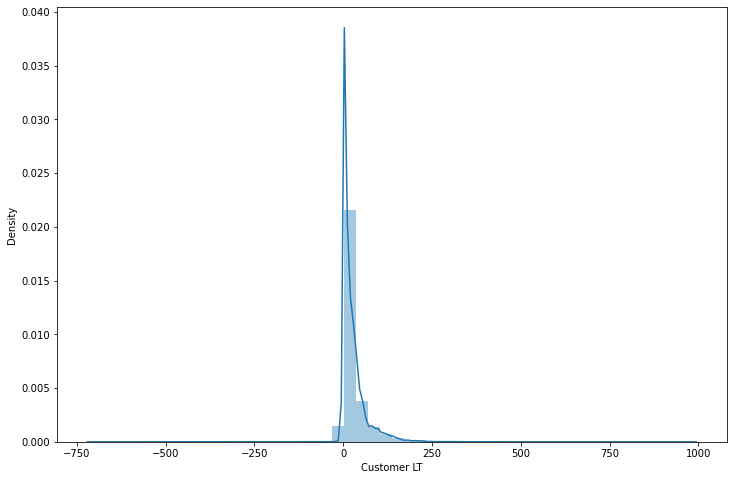

In [118]:
plt.figure(figsize=(12,8))
sns.distplot(df2['Customer LT'])

C:\Users\te521690\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shipping LT', ylabel='Density'>

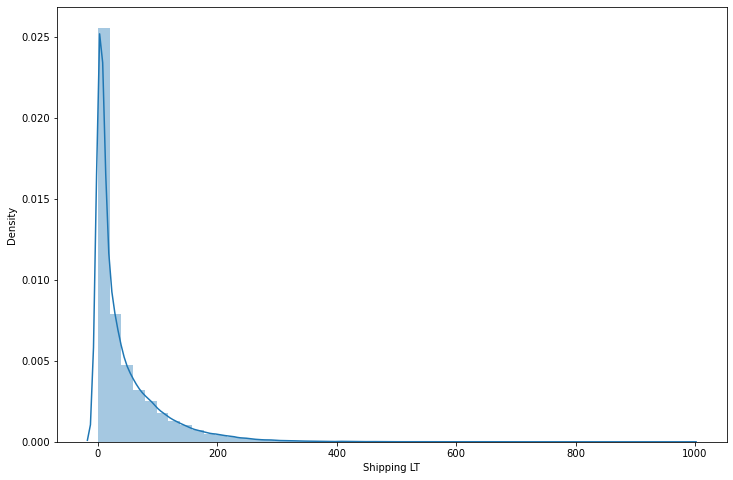

In [119]:
plt.figure(figsize=(12,8))
sns.distplot(df2['Shipping LT'])

<AxesSubplot:xlabel='Customer LT', ylabel='Shipping LT'>

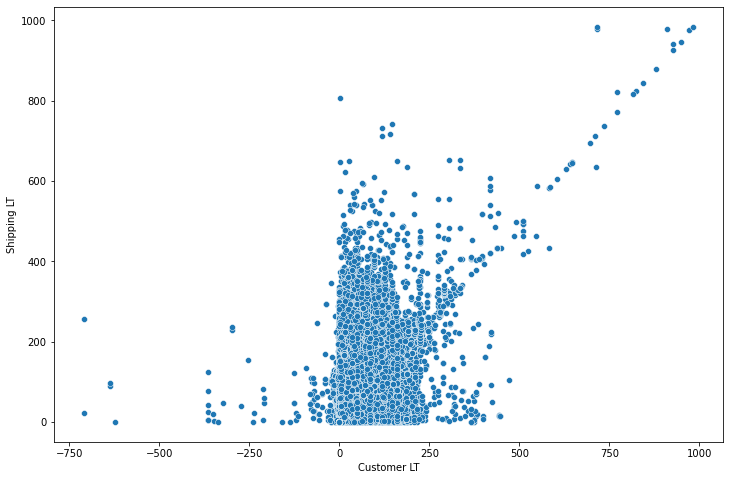

In [120]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Customer LT',y='Shipping LT',data=df2)

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113588 entries, 0 to 113587
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   OTTO-GPL           113588 non-null  object        
 1   Part               113588 non-null  object        
 2   Part Type          113588 non-null  object        
 3   QtyInvoiced        113588 non-null  float64       
 4   Ord-Dt             113588 non-null  datetime64[ns]
 5   ReqDt              113588 non-null  datetime64[ns]
 6   Original Due Date  113588 non-null  datetime64[ns]
 7   InvoiceDt          113588 non-null  datetime64[ns]
 8   TE_ship LT         113588 non-null  int64         
 9   Customer LT        113588 non-null  int64         
 10  Shipping LT        113588 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(3), object(3)
memory usage: 10.4+ MB


In [122]:
# Identify the columns containing string variables
string_columns = ['Part', 'OTTO-GPL', 'Part Type']

# Convert columns to string data type. added on June 27, 2023
#df2[string_columns] = df2[string_columns].astype(str)

# Perform one-hot encoding
dummy_variables = pd.get_dummies(df2[string_columns])

# Concatenate the dummy variables with the original dataset
df_encoded = pd.concat([df2, dummy_variables], axis=1)

# Drop the original string columns if needed
df3 = df_encoded.drop(string_columns, axis=1)


In [123]:
import datetime

today_str = '12/25/2022'
today_date = datetime.datetime.strptime(today_str, '%m/%d/%Y')

timestamp_int = int(today_date.timestamp())
print(timestamp_int)


1671944400


In [124]:
from datetime import datetime

# Convert 'Ord-Dt' column to datetime
df3['Ord-Dt'] = pd.to_datetime(df3['Ord-Dt'])
# Convert datetime to Unix timestamp
df3['Ord-Dt_Euc'] = df3['Ord-Dt'].apply(lambda x: x.to_pydatetime().timestamp())

# Convert 'Ord-Dt' column to datetime
df3['ReqDt'] = pd.to_datetime(df3['ReqDt'])
# Convert datetime to Unix timestamp
df3['ReqDt_Euc'] = df3['ReqDt'].apply(lambda x: x.to_pydatetime().timestamp())

# Convert 'Ord-Dt' column to datetime
df3['Original Due Date'] = pd.to_datetime(df3['Original Due Date'])
# Convert datetime to Unix timestamp
df3['DueDt_Euc'] = df3['Original Due Date'].apply(lambda x: x.to_pydatetime().timestamp())

# # Convert 'Ord-Dt' column to datetime
# df3['InvoiceDt'] = pd.to_datetime(df3['InvoiceDt'])
# # Convert datetime to Unix timestamp
# df3['InvoiceDt_Euc'] = df3['InvoiceDt'].apply(lambda x: x.to_pydatetime().timestamp())



In [125]:
df3 = df3.drop(['Ord-Dt','ReqDt','Original Due Date','InvoiceDt'], axis=1)

In [126]:
df2['Part'].value_counts()

871788-000    1729
360954-000    1471
197886-000     898
268120-000     822
244890-000     816
              ... 
2182485-2        1
CU5612-000       1
CG3665-000       1
2182445-3        1
E31927-000       1
Name: Part, Length: 2124, dtype: int64

In [127]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113588 entries, 0 to 113587
Columns: 2184 entries, QtyInvoiced to DueDt_Euc
dtypes: float64(4), int64(3), uint8(2177)
memory usage: 242.8 MB


In [128]:
df2.groupby(by = 'OTTO-GPL').mean().reset_index()

,OTTO-GPL,QtyInvoiced,TE_ship LT,Customer LT,Shipping LT
0,141,1055.020504,63.737551,39.997071,47.933802
1,151,9.682173,25.644822,13.724618,27.981664
2,364,525.744962,73.193177,30.180622,54.403200
3,435,8190.933673,183.658163,91.826531,201.045918
4,566,5.166667,31.833333,47.500000,60.500000
5,652,3918.328261,11.695652,12.478261,11.260870
6,748,5.753731,77.522388,70.619403,71.500000
7,749,174.186739,35.665327,18.145799,23.503202
8,750,57.293121,47.597023,36.365503,56.590349
9,751,130.977009,31.483885,21.671036,34.121616


In [129]:
df3.columns

Index(['QtyInvoiced', 'TE_ship LT', 'Customer LT', 'Shipping LT',
       'Part_000144-000', 'Part_004049-000', 'Part_004354-000',
       'Part_007356-000', 'Part_008440-000', 'Part_011589-000',
       ...
       'OTTO-GPL_Z63', 'OTTO-GPL_Z72', 'Part Type_ATO', 'Part Type_COMP',
       'Part Type_MTO', 'Part Type_MTS', 'Part Type_MTSQS', 'Ord-Dt_Euc',
       'ReqDt_Euc', 'DueDt_Euc'],
      dtype='object', length=2184)

### ここからLight GBMでのRegression Treeを開始

In [130]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import graphviz

In [132]:
X = df3.drop('Shipping LT',axis=1)
y = df3['Shipping LT']

In [133]:
X_train_0, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [134]:
lgb_train = lgb.Dataset(X_train_0, y_train)

In [150]:
params = {
    'objective':'mse',
    'metric':'mse',
    'learning_rate':0.8,
    'max_depth':50,
    'min_data_in_leaf':1,
    'min_data-in_bin':1,
    'max_bin':100,
    'seed':0,
    'verbose':-1,
}

In [151]:
model = lgb.train(params,
                 lgb_train,
                 num_boost_round=1,
                 valid_sets=[lgb_train],
                 valid_names=['train'],
                 callbacks=[lgb.log_evaluation(10)])

In [137]:
y_train_pred = model.predict(X_train_0)

In [138]:
print('MSE train: %.2f' % (mean_squared_error(y_train, y_train_pred)))

MSE train: 1805.72


In [139]:
model.predict(X_train_0)

array([ 40.33571315,  12.18810857,  40.33571315, ...,  40.33571315,
       118.451932  ,  40.33571315])

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

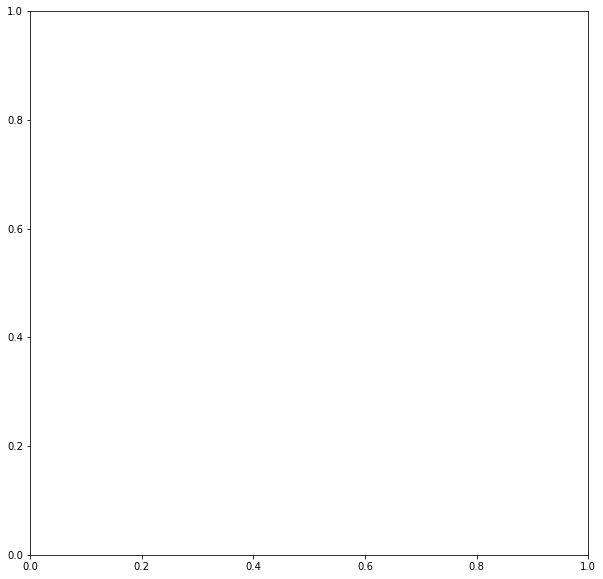

In [140]:
lgb.plot_tree(model,tree_index=0, figsize=(10,10))

In [141]:
plt.figure(figsize=(8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [147]:
# convert to numpy array in one dimension
x = X_train_0.values.flatten()
y = y_train.values

# xの最小値から最大値まで0.01刻みのx_pltを作成し、2次元配列に変換
x_plt = np.arange(x.min(), x.max())[:, np.newaxis]
y_pred = model.predict(x_plt)

MemoryError: Unable to allocate 14.1 GiB for an array with shape (1893507600,) and data type float64

ValueError: x and y must be the same size

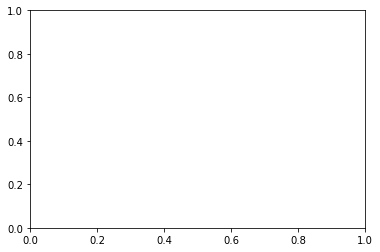

In [148]:
# 学習データの散布図と予測値のプロット
plt.scatter(x, y, color='blue', label='data')
plt.plot(x_plt, y_pred, color='red', label='LightGBM')
plt.ylabel('')
plt.xlabel('')
plt.title('X-y plot')
plt.legend(loc='upper right')
plt.show()